# Results - Musical Noise

In [1]:
import numpy as np
from mcsm_benchs.Benchmark import Benchmark
from mcsm_benchs.ResultsInterpreter import ResultsInterpreter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from src.utilities.utilstf import get_spectrogram
from matplotlib import pyplot as plt
from IPython.display import Audio
import scipy.signal as sg
import os
import pickle


In [2]:
# Synthetic signal
N = 4*2048
x = np.zeros((N,))
fs = 8000 #11025
for i in range(4):
    instf = (i+1) * 0.1 + 0.002*np.cos(2*np.pi*5*np.arange(N)/N)
    phase = np.cumsum(instf)
    xaux = (1.2**(-i))*np.cos(2*np.pi*phase)
    x += xaux
# x[0:1024] = 0    
x = x*(sg.windows.tukey(N,0.75))

spectro,stft = get_spectrogram(x,Nfft=2*N)

Audio(x, rate=fs)

In [3]:
Nfft = 2*1024
# Parameters
lmax = np.arange(1.0,2.2,0.1)
thr = np.arange(0.25,6.0,0.25)
SNRs = [0, 10, 20, 30]
reps=50

# Results array
PESQ_ht = np.zeros((len(SNRs),len(thr),5),)
QRF_ht = np.zeros((len(SNRs),len(thr),reps),)
APS_ht = np.zeros((len(SNRs),len(thr),reps),)

PESQ_dt = np.zeros((len(SNRs),len(lmax),5),)
QRF_dt = np.zeros((len(SNRs),len(lmax),reps),)
APS_dt = np.zeros((len(SNRs),len(lmax),reps),)

## QRF Results

In [4]:
# Load the benchmark results
filename = os.path.join('..','results','last_benchmark_MN_QRF')
benchmark_qrf = Benchmark.load_benchmark(filename)
interpreter = ResultsInterpreter(benchmark_qrf)
interpreter.signal_ids

{'Signal1': array([ 0.00000000e+00, -1.98763939e-07, -2.77337746e-07, ...,
         3.24858926e-06,  1.08175624e-07, -0.00000000e+00])}

In [5]:
# Get report and figures for the paper/repository

# Interactive figures shown in the repo
interpreter.get_html_figures(path='../results/denoising_mn/qrf',bars=True)

# .csv files for sharing results
interpreter.get_csv_files(path='../results/denoising_mn/qrf')

# Report shown in the repo 
interpreter.save_report(filename='results_musical_noise_QRF.md', path='../results', link='https://jmiramont.github.io/benchmarks-detection-denoising/results/denoising_mn/qrf')

# Check DataFrame of results.
df_rearr = interpreter.rearrange_data_frame()
df_rearr


df_qrf = benchmark_qrf.get_results_as_df() # This formats the results on a DataFrame
df_qrf

,Method,Parameter,Signal_id,Repetition,0,10,20,30
3550,dt,{'LB': 1.0},Signal1,0,0.111738,10.154972,20.245304,30.327398
3551,dt,{'LB': 1.0},Signal1,1,0.133570,10.172071,20.268495,30.359748
3552,dt,{'LB': 1.0},Signal1,2,0.121637,10.167082,20.248971,30.321049
3553,dt,{'LB': 1.0},Signal1,3,0.112037,10.157152,20.245647,30.347997
3554,dt,{'LB': 1.0},Signal1,4,0.103653,10.155108,20.234817,30.319566
...,...,...,...,...,...,...,...,...
3345,ht,{'coeff': 5.75},Signal1,45,0.000000,8.245270,20.602812,31.359242
3346,ht,{'coeff': 5.75},Signal1,46,0.000000,8.335725,20.550895,31.472317
3347,ht,{'coeff': 5.75},Signal1,47,0.004639,8.446569,20.689964,31.293199
3348,ht,{'coeff': 5.75},Signal1,48,0.000000,8.506234,20.873925,31.232676


In [6]:
dt_params = np.unique(df_qrf['Parameter'][df_qrf['Method']=='dt'])
thr_params = np.unique(df_qrf['Parameter'][df_qrf['Method']=='ht'])
for i,snr in enumerate(SNRs):
    for j,lb in enumerate(dt_params):
        QRF_dt[i,j,:] = df_qrf[snr][df_qrf['Parameter']==lb]

    for j,lb in enumerate(thr_params):
        QRF_ht[i,j,:] = df_qrf[snr][(df_qrf['Parameter']==lb)*(df_qrf['Method']=='ht')]

## APS Results

In [7]:
filename = os.path.join('..','results','last_benchmark_MN')
benchmark_aps = Benchmark.load_benchmark(filename)
interpreter = ResultsInterpreter(benchmark_aps)

interpreter.signal_ids


{'Signal1': array([ 0.00000000e+00, -1.98763939e-07, -2.77337746e-07, ...,
         3.24858926e-06,  1.08175624e-07, -0.00000000e+00])}

In [8]:
# Get report and figures for the paper/repository

# Interactive figures shown in the repo
interpreter.get_html_figures(path='../results/denoising_mn/aps',bars=True,ylabel='APS')

# .csv files for sharing results
interpreter.get_csv_files(path='../results/denoising_mn/aps')

# Report shown in the repo 
interpreter.save_report(filename='results_musical_noise_APS.md', path='../results', link='https://jmiramont.github.io/benchmarks-detection-denoising/results/denoising_mn/aps')

df_aps = benchmark_aps.get_results_as_df() # This formats the results on a DataFrame
df_aps

,Method,Parameter,Signal_id,Repetition,0,10,20,30
3550,dt,{'LB': 1.0},Signal1,0,83.881959,86.738368,86.738368,86.738368
3551,dt,{'LB': 1.0},Signal1,1,86.095266,86.738368,86.738368,86.738368
3552,dt,{'LB': 1.0},Signal1,2,86.738368,86.738368,86.738368,86.738368
3553,dt,{'LB': 1.0},Signal1,3,86.738368,86.738368,86.738368,86.738368
3554,dt,{'LB': 1.0},Signal1,4,82.633718,86.738368,86.738368,86.738368
...,...,...,...,...,...,...,...,...
3345,ht,{'coeff': 5.75},Signal1,45,86.738368,3.385284,85.205144,86.738368
3346,ht,{'coeff': 5.75},Signal1,46,86.738368,11.413661,85.927397,86.738368
3347,ht,{'coeff': 5.75},Signal1,47,0.134680,3.960100,85.995021,86.738368
3348,ht,{'coeff': 5.75},Signal1,48,86.738368,8.702595,86.173555,86.738368


In [9]:
dt_params = np.unique(df_aps['Parameter'][df_aps['Method']=='dt'])
thr_params = np.unique(df_aps['Parameter'][df_aps['Method']=='ht'])
for i,snr in enumerate(SNRs):
    for j,lb in enumerate(dt_params):
        APS_dt[i,j,:] = df_aps[snr][df_aps['Parameter']==lb]

    for j,lb in enumerate(thr_params):
        APS_ht[i,j,:] = df_aps[snr][(df_aps['Parameter']==lb)*(df_aps['Method']=='ht')]

# Plots

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

/tmp/ipykernel_12275/85517878.py:45: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.



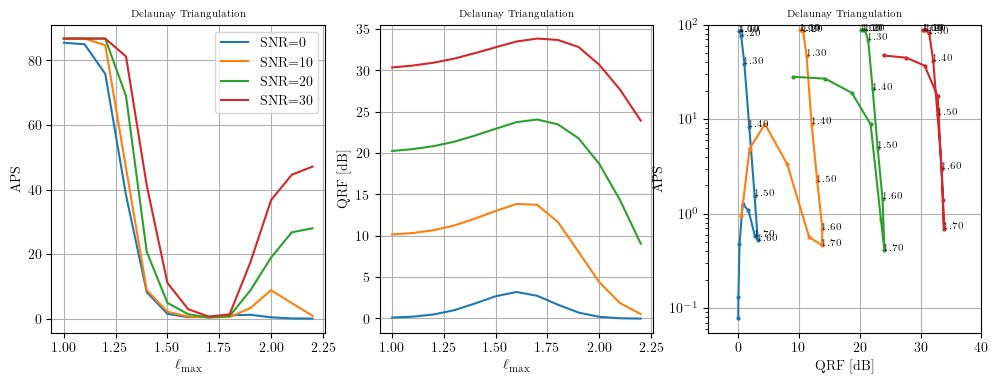

In [11]:
# %matplotlib widget
fig, ax = plt.subplots(1,3, figsize=(12,4))

# APS vs. lmax
for q in range(len(SNRs)):
    # ax.plot(distortion,np.mean(DeltaK_PI_ht[q,:,0:8],axis=1))
    ax[0].plot(lmax,np.mean(APS_dt[q,:,:],axis=1),label='SNR={}'.format(SNRs[q]))

ax[0].set_title('Delaunay Triangulation', fontsize=7.0)
ax[0].set_xlabel(r"$\ell_{\max}$")
ax[0].set_ylabel(r"APS")
ax[0].legend()
ax[0].grid(True)

# QRF vs. lmax
for q in range(len(SNRs)):
    # ax.plot(distortion,np.mean(DeltaK_PI_ht[q,:,0:8],axis=1))
    ax[1].plot(lmax,np.mean(QRF_dt[q,:,:],axis=1),label='SNR={}'.format(SNRs[q]))


ax[1].set_title('Delaunay Triangulation', fontsize=7.0)
ax[1].set_xlabel(r"$\ell_{\max}$")
ax[1].set_ylabel(r"QRF [dB]")
# ax[1].legend()
ax[1].grid(True)

# APS vs QRF ---------------------------------------------------------------------------
for q in range(len(SNRs)):
    ax[2].semilogy(np.mean(QRF_dt[q,:,:],axis=1),np.mean(APS_dt[q,:,:],axis=1),'-o',label='SNR={}'.format(SNRs[q]), ms=2.0)

    for j in range(len(lmax)-5):
        u = np.mean(QRF_dt[q,j,:],axis=0)
        v = np.mean(APS_dt[q,j,:],axis=0)
        # ax.loglog(u,v,'--', color="0.5")
        
        # angle = 180*np.arctan2((v[2]-v[1]),(u[2]-u[1]))/np.pi
        ax[2].text(u,v,r"{:.2f}".format(lmax[j]),
                fontsize=7.0,)
                # rotation=angle)

ax[2].set_title('Delaunay Triangulation', fontsize=7.0)
ax[2].set_xlabel(r"QRF [dB]")
ax[2].set_xlim([-5, 40])
ax[2].set_ylabel(r"APS")
ax[2].set_ylim([0, 100])
# ax[2].legend()
ax[2].grid(True)


## Thresholding Results

/tmp/ipykernel_12275/2058949873.py:41: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.



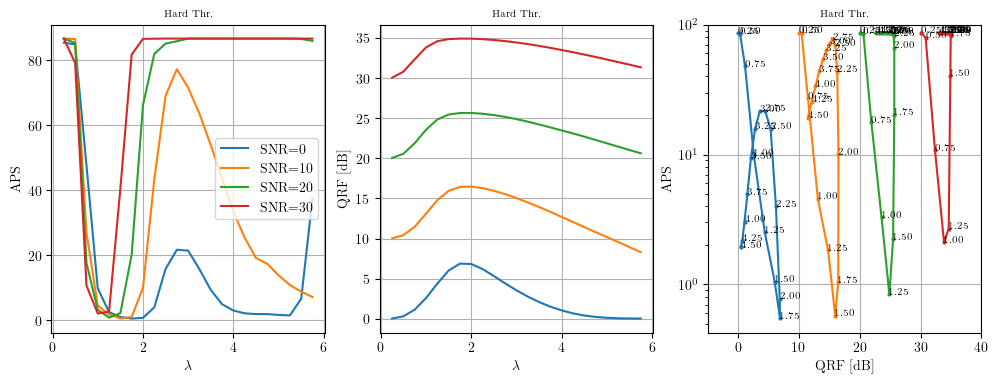

In [12]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

# APS vs. lambda -----------------------------------------------------------------------
for q in range(len(SNRs)):
    ax[0].plot(thr,np.mean(APS_ht[q,:,:],axis=1),label='SNR={}'.format(SNRs[q]))

ax[0].set_title('Hard Thr.', fontsize=7.0)
ax[0].set_xlabel(r"$\lambda$")
ax[0].set_ylabel(r"APS")
ax[0].legend()
ax[0].grid(True)

# QRF vs. lambda -----------------------------------------------------------------------
for q in range(len(SNRs)):
    ax[1].plot(thr,np.mean(QRF_ht[q,:,:],axis=1),label='SNR={}'.format(SNRs[q]))


ax[1].set_title('Hard Thr.', fontsize=7.0)
ax[1].set_xlabel(r"$\lambda$")
ax[1].set_ylabel(r"QRF [dB]")
ax[1].grid(True)

# APS vs QRF ---------------------------------------------------------------------------
for q in range(len(SNRs)):
    ax[2].semilogy(np.mean(QRF_ht[q,:-5,:],axis=1),np.mean(APS_ht[q,:-5,:],axis=1),'-o',label='SNR={}'.format(SNRs[q]), ms=2.0)

    for j in range(len(thr)-5):
        u = np.mean(QRF_ht[q,j,:],axis=0)
        v = np.mean(APS_ht[q,j,:],axis=0)
        # ax.loglog(u,v,'--', color="0.5")
        
        # angle = 180*np.arctan2((v[2]-v[1]),(u[2]-u[1]))/np.pi
        ax[2].text(u,v,r"{:.2f}".format(thr[j]),
                fontsize=7.0,)
                # rotation=angle)

ax[2].set_title('Hard Thr.', fontsize=7.0)
ax[2].set_xlabel(r"QRF [dB]")
ax[2].set_xlim([-5, 40])
ax[2].set_ylabel(r"APS")
ax[2].set_ylim([0, 100])
# ax[2].legend()
ax[2].grid(True)

/tmp/ipykernel_12275/4197533291.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_12275/4197533291.py:75: UserWarning:

FixedFormatter should only be used together with FixedLocator



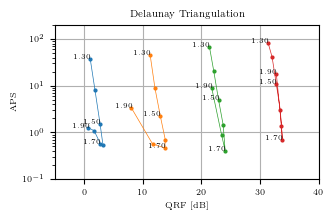

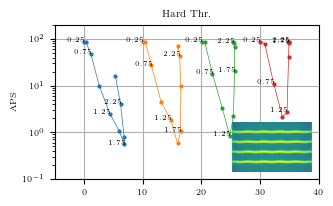

<Figure size 640x480 with 0 Axes>

In [13]:
fw,fh = (3.4,2)
fix, ax = plt.subplots(1,1, figsize= (fw,fh))

# APS vs QRF ---------------------------------------------------------------------------
for q in range(len(SNRs)):
    ax.semilogy(np.mean(QRF_dt[q,3:-3,:],axis=1),np.mean(APS_dt[q,3:-3,:],axis=1),'-o',label='SNR={}'.format(SNRs[q]), ms=2.0, linewidth=0.5)

    for j in range(3,len(lmax)-3,2):
        u = np.mean(QRF_dt[q,j,:],axis=0)
        v = np.mean(APS_dt[q,j,:],axis=0)
        # ax.loglog(u,v,'--', color="0.5")
        
        # angle = 180*np.arctan2((v[2]-v[1]),(u[2]-u[1]))/np.pi
        ax.text(u,v,r"{:.2f}".format(lmax[j]),
                fontsize=5.0,
                horizontalalignment='right',)
                # rotation=angle)

ax.set_title('Delaunay Triangulation', fontsize=7.0)
ax.set_xlabel(r"QRF [dB]", fontsize=6.0)
ax.set_xlim([-5, 40])
ax.set_ylabel(r"APS", fontsize=6.0)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=6.0)
ax.set_xticks([0,10,20,30,40])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6.0)
ax.set_ylim([0.1, 200])
# ax.legend()
ax.grid(True)

# Save figure
fix.savefig('figures/aps_vs_qrf_DT.pdf',
             dpi=900, 
             transparent=False, 
             bbox_inches='tight', 
             pad_inches=0.01,
            )

# # Save figure
# fix.savefig('aps_vs_qrf_DT_2.pdf', dpi=900, transparent=False, bbox_inches='tight')

# APS vs QRF ---------------------------------------------------------------------------
fix, ax = plt.subplots(1,1, figsize= (fw,fh))

axins = inset_axes(ax, width=0.8, height=0.5, loc=4) #loc=spectrogram_loc[i])
axins.imshow(np.log(np.abs(stft[0:N])), origin='lower', aspect='auto')
axins.axis('off')
fig.canvas.draw()
axins.tick_params(axis='both', 
                    which='both', 
                    bottom=False, 
                    top=False, 
                    labelbottom=False, 
                    right=False, 
                    left=False, 
                    labelleft=False)

for q in range(len(SNRs)):
    ax.semilogy(np.mean(QRF_ht[q,:-13,:],axis=1),np.mean(APS_ht[q,:-13,:],axis=1),'-o',label='SNR={}'.format(SNRs[q]), ms=2.0, linewidth=0.5)

    for j in range(0, len(thr)-13,2):
        u = np.mean(QRF_ht[q,j,:],axis=0)
        v = np.mean(APS_ht[q,j,:],axis=0)
        # ax.loglog(u,v,'--', color="0.5")
        
        # angle = 180*np.arctan2((v[2]-v[1]),(u[2]-u[1]))/np.pi
        ax.text(u,v,r"{:.2f}".format(thr[j]),
                fontsize=5.0,
                horizontalalignment='right',)

ax.set_title('Hard Thr.', fontsize=7.0)
# ax.set_xlabel(r"QRF [dB]", fontsize=6.0)
ax.set_xlim([-5, 40])
ax.set_ylabel(r"APS", fontsize=6.0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6.0)
ax.set_xticks([0,10,20,30,40])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6.0)
ax.set_ylim([0.1, 200])
# ax.legend()
ax.grid(True)
# Save figure
fix.savefig('figures/aps_vs_qrf_HT.pdf', 
            dpi=900, 
            transparent=False, 
            bbox_inches='tight',
            pad_inches=0.01,
            ) 

# # Save figure
# fix.savefig('figures/aps_vs_qrf_ST.pdf', dpi=900, transparent=False, bbox_inches='tight')


new_legends = (r'SNR = 0 dB',r'SNR = 10 dB',r'SNR = 20 dB',r'SNR = 30 dB')
legendFig = plt.figure()
# legendFig.set_size_inches((fig_size_w,fig_size_h))

# h,l = ax.get_legend_handles_labels()
# legendFig.legend(h,new_legends, 
#             fontsize='xx-small', 
#             frameon=False, 
#             loc='center', 
#             ncol=4
#             )
# legendFig.canvas.draw()
# legendFig.savefig('legend_mn.pdf', dpi=900, transparent=False, bbox_inches='tight')
# legendFig.add_axes([0,0,0,0])
# plt.show()


